# **Authentication**

Everytime before you make connection to Google Cloud via API, you need to run the below code to grant access to Google Cloud services.

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

# **Load data into BigQuery(创建完成就不用跑了)**

The following codes help you load data from bucket to your BigQuery.

### Step 0: (Optional) Create a new project in Google Cloud

If you want an independent project to handle the data and analysis, you can create a new project in your Google Cloud.
![picture](https://drive.google.com/uc?id=18bayQbOjHw8Uq-QkMwYhupi8FPtT9Dmm)

Of course, you can continue using the existed project if you wish.


### Step 1: Create a new dataset in your BigQuery to store your project data

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [ ]:
def create_dataset(project_id, dataset_id, location="US"):
    client = bigquery.Client(project=project_id)
    dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = location

    created_dataset = client.create_dataset(dataset, timeout=30)  # Waits 30 seconds
    print("Dataset {} created.".format(created_dataset.dataset_id))

# Usage
create_dataset('bdao-ima01', 'restaurant_dataset') # Replace 'your-project-id' with your Google Cloud project ID and 'your-new-datatset-name' with your desired dataset name

### Step 2: Load data into the dataset you just created in BigQuery

In [ ]:
# Load the restaurant data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_name = "restaurant_data"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_data.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: bdao-ima01.restaurant_dataset.restaurant_data


In [ ]:
# Load the restaurant tips data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_name = "restaurant_tips"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_tips.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: bdao-ima01.restaurant_dataset.restaurant_tips


In [ ]:
# Load the data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_name = "restaurant_checkin"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_checkin.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: bdao-ima01.restaurant_dataset.restaurant_checkin


Until here, you have successfully loaded all data into your data warehouse (BigQuery) in Google Cloud.

# **Query data from BigQuery and do analysis**

Now that the data is stored in BigQuery, you can make connection to BigQuery and extract data you want.

### Query data from restaurant data file

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,RK6-cJ9hj53RzOlCBmpT-g,Impasto,None,Tampa,FL,33611,27.890814,-82.502346,5.0,5,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
# Query data from selected columns from the table: Attributes
query = f"""
    SELECT business_id, stars, RestaurantsDelivery, OutdoorSeating, BusinessAcceptsCreditCards, BusinessParking, BikeParking, RestaurantsPriceRange2, RestaurantsTakeOut, ByAppointmentOnly, WiFi,
    Alcohol, Caters, RestaurantsAttire, RestaurantsReservations, Ambience, GoodForKids, CoatCheck, DogsAllowed, RestaurantsTableService, RestaurantsGoodForGroups, WheelchairAccessible, HasTV,
    HappyHour, DriveThru, NoiseLevel, GoodForMeal, BusinessAcceptsBitcoin, Smoking, Music, GoodForDancing, BestNights, BYOB, Corkage, Parking
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_attributes_df = query_job.to_dataframe()
restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,kfNv-JZpuN6TVNSO6hHdkw,4.0,True,<NA>,<NA>,None,<NA>,2,True,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,sqSqqLy0sN8n2IZrAbzidQ,3.5,<NA>,<NA>,<NA>,None,<NA>,1,<NA>,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,ABxoFuzZy5mqQ8C5FJJajQ,5.0,<NA>,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,<NA>,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,RK6-cJ9hj53RzOlCBmpT-g,5.0,False,<NA>,True,None,<NA>,<NA>,True,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,EuRGgOwJ0g1vTj2R04j37Q,2.5,True,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,True,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


### Query data from restaurant checkin data file

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_name = "restaurant_checkin" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,GyC36Pn0Q1-qHnqXys6yFg,2016-05-01 18:19:00+00:00,512,True,2016,5,1,18
1,aS2HD_XKuCAMwjRHQ_b5-g,2018-04-01 17:07:07+00:00,512,True,2018,4,1,17
2,iVELyU76Ej483EI0eVOJNA,2013-07-01 03:41:21+00:00,512,True,2013,7,1,3
3,wqXxljKfGErIHz3LQfuQlg,2014-02-01 18:38:14+00:00,768,True,2014,2,1,18
4,wHiPhPVuGnngEieDBMG00g,2016-07-01 23:17:36+00:00,1792,True,2016,7,1,23


In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE year >=2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_after2020_df = query_job.to_dataframe()
checkin_after2020_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,B6Cn6maWQ6sLhLwYGLhSlg,2020-01-06 17:12:37+00:00,256,True,2020,1,6,17
1,FZuzdnT1k5Dx_VcVXpK5fw,2020-01-05 00:04:44+00:00,256,True,2020,1,5,0
2,NVrDBWqUVw-59RpriLG6yA,2020-01-01 19:56:06+00:00,256,True,2020,1,1,19
3,W7gSJz80DywKnPRIGjA2Bw,2020-01-12 02:44:36+00:00,256,True,2020,1,12,2
4,c8R7kt6bpkc--N7l7V3OfA,2021-01-25 01:14:32+00:00,256,True,2021,1,25,1


### Query data from restaurant tips data file

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

tips_df = query_job.to_dataframe()
tips_df

,user_id,business_id,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10+00:00,0
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02+00:00,0
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05+00:00,0
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00,0
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34+00:00,0
...,...,...,...,...,...
649176,tsMF0FcFcHZ8i28WzWtQXw,2VuOLrhe2Iu_FRz1gEIqQA,They are closed at 530 when the sign says 6:00.,2019-07-19 21:30:00+00:00,4
649177,Oi1qbcz2m2SnwUeztGYcnQ,Ht66H1iGx0llc7ne81tjBw,Look at the stars people! I'd rather have a ro...,2013-11-18 00:47:06+00:00,4
649178,A4bsa7ykYRVCnb4h2vZALw,3Wy21heeDm8h2tSZfcj6OA,30 minute wait for our drink order is unaccept...,2017-01-15 22:16:30+00:00,5
649179,tsMF0FcFcHZ8i28WzWtQXw,dsfRniRgfbDjC8os848B6A,Experience Bern's by sitting at the bar too . ...,2020-03-05 01:28:45+00:00,6


### Joining tables through SQL query

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdao-ima01"
dataset_name = "restaurant_dataset"
table_1 = "restaurant_data"
table_2 = "restaurant_checkin"
table_3 = "restaurant_tips"

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Adding restaurant information to checkin data by joining 'restaurant_checkin' and 'restaurant_data'
query = f"""
    SELECT r.business_id, r.name, r.city, r.state, r.stars, r.review_count, r.is_open, r.categories,c.business_id, c.total_number_of_checkin
    FROM `{project_id}.{dataset_name}.{table_2}` AS c
    JOIN `{project_id}.{dataset_name}.{table_1}` AS r on r.business_id = c.business_id
"""

query_job = bigquery_client.query(query)
results = query_job.result()

join_df = query_job.to_dataframe()
join_df.head()

,business_id,name,city,state,stars,review_count,is_open,categories,business_id_1,total_number_of_checkin
0,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",1d9CWYU1XXvzeQrBLLPIbg,239
1,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",1d9CWYU1XXvzeQrBLLPIbg,239
2,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",1d9CWYU1XXvzeQrBLLPIbg,239
3,25ylMszF0TtZES6P7m6fvA,Brick Oven Cafe,Kenner,LA,3.5,144,1,"Restaurants, Caterers, Party & Event Planning,...",25ylMszF0TtZES6P7m6fvA,239
4,25ylMszF0TtZES6P7m6fvA,Brick Oven Cafe,Kenner,LA,3.5,144,1,"Restaurants, Caterers, Party & Event Planning,...",25ylMszF0TtZES6P7m6fvA,239


When joining, be careful of one-to-many. In restaurant data there are information for each restaurant, but in checkin and tips data there are multiple records for one single restaurants. Thus, it is better to use checkin or tips data to join restaurant data. If you do the opposite, you might have error and query incomplete data.

If you are just not familiar with SQL, you can just query dataset one by one and then use Python to merge or join them if you need.

# **Data processing**

Since the query data is converted into dataframe, you can easily use Python to do analysis or modelling. This is up to you how you would do.

##Restaurant_data processing

###Create a df without attributes

In [ ]:
selected_columns = [
    'attributes', 'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BusinessParking',
    'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi',
    'Alcohol', 'Caters', 'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'GoodForKids',
    'CoatCheck', 'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups', 'WheelchairAccessible', 'HasTV',
    'HappyHour', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking',
    'Music', 'GoodForDancing', 'BestNights', 'BYOB', 'Corkage', 'Parking'
]

# Create a dataframe without attributes
restaurant_withoutattributes_df = restaurant_df.drop(columns=selected_columns)
restaurant_withoutattributes_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,category_WineBars,category_WineTastingClasses,category_WineTastingRoom,category_WineTours,category_Wineries,category_Women_sClothing,category_Wraps,category_YelpEvents,category_Yoga,category_Zoos
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,...,0,0,0,0,0,0,0,0,0,0
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,...,0,0,0,0,0,0,0,0,0,0
2,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,...,0,0,0,0,0,0,0,0,0,0
3,RK6-cJ9hj53RzOlCBmpT-g,Impasto,None,Tampa,FL,33611,27.890814,-82.502346,5.0,5,...,0,0,0,0,0,0,0,0,0,0
4,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
restaurant_withoutattributes_df.shape

(52286, 743)

###Check missing value

In [ ]:
# Calculate the number of missing values in each column
missing_values = restaurant_withoutattributes_df.isnull().sum()

columns_with_missing = missing_values[missing_values > 0] # show missing value column > 0
print(columns_with_missing)

address         443
postal_code      21
hours          7279
dtype: int64


In [ ]:
restaurant_withoutattributes_df.drop(columns=['address', 'postal_code', 'hours'], inplace=True)
restaurant_withoutattributes_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,category_WineBars,category_WineTastingClasses,category_WineTastingRoom,category_WineTours,category_Wineries,category_Women_sClothing,category_Wraps,category_YelpEvents,category_Yoga,category_Zoos
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,Indianapolis,IN,39.904320,-86.053080,4.0,20,1,"Steakhouses, Asian Fusion, Restaurants",...,0,0,0,0,0,0,0,0,0,0
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,White House,TN,36.464747,-86.659187,3.5,8,1,"Pizza, Chicken Wings, Sandwiches, Restaurants",...,0,0,0,0,0,0,0,0,0,0
2,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,Bala Cynwyd,PA,40.028357,-75.238084,5.0,12,1,"Restaurants, Italian",...,0,0,0,0,0,0,0,0,0,0
3,RK6-cJ9hj53RzOlCBmpT-g,Impasto,Tampa,FL,27.890814,-82.502346,5.0,5,1,"Restaurants, Italian, Food Trucks, Food",...,0,0,0,0,0,0,0,0,0,0
4,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,Fairview Heights,IL,38.601298,-89.989683,2.5,14,1,"Seafood, Restaurants",...,0,0,0,0,0,0,0,0,0,0


###Check duplicates

In [ ]:
# Number of unique and duplicated rows
restaurant_withoutattributes_df.duplicated().value_counts()

False    52286
Name: count, dtype: int64

Download Restaurant without attributes data

In [ ]:
# restaurant_withoutattributes_df.to_csv('/content/Restaurant without attributes data.csv', index=False)

##Restaurant_checkin processing

In [ ]:
checkin_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,LnJSsNVZkStgtj86fJrKxQ,2015-10-01 20:38:05+00:00,512,True,2015,10,1,20
1,nX2105_S9lUhB5rbhC2n2w,2012-07-01 15:36:37+00:00,512,True,2012,7,1,15
2,JFShrvfR86GnWUaITaGRkA,2018-09-01 04:11:44+00:00,1280,True,2018,9,1,4
3,GqyOrF5X21ciTjnuSCH5PQ,2011-12-01 03:09:47+00:00,2560,True,2011,12,1,3
4,mpeLyxsDTm5RqZkFT--SdQ,2014-10-01 15:43:59+00:00,769,True,2014,10,1,15


In [ ]:
# Find the number of rows and columns
checkin_df.shape

(8515582, 8)

###Check missing value

In [ ]:
checkin_df.isnull().sum()

business_id                0
date                       0
total_number_of_checkin    0
restaurant                 0
year                       0
month                      0
day                        0
hour                       0
dtype: int64

In [ ]:
# sort the table from high to low
# checkin_df = checkin_df.sort_values(by='total_number_of_checkin')
# checkin_df

###Convert to year-month data

In [ ]:
# Delete irrelevant columns
checkin_yearmonth_df = checkin_df.drop(columns=['total_number_of_checkin', 'restaurant', 'day', 'hour'])

# Extract the year and month and create a new column
checkin_yearmonth_df['date'] = checkin_yearmonth_df['date'].dt.to_period('M')
checkin_yearmonth_df.head()

<ipython-input-109-c6cf8893c250>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  checkin_yearmonth_df['date'] = checkin_yearmonth_df['date'].dt.to_period('M')


,business_id,date,year,month
0,LnJSsNVZkStgtj86fJrKxQ,2015-10,2015,10
1,nX2105_S9lUhB5rbhC2n2w,2012-07,2012,7
2,JFShrvfR86GnWUaITaGRkA,2018-09,2018,9
3,GqyOrF5X21ciTjnuSCH5PQ,2011-12,2011,12
4,mpeLyxsDTm5RqZkFT--SdQ,2014-10,2014,10


###Download Checkin year-month data

In [ ]:
# checkin_yearmonth_df.to_csv('/content/Checkin year-month data.csv', index=False)

##Restaurant_tips processing

In [ ]:
tips_df.head()

,user_id,business_id,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10+00:00,0
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02+00:00,0
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05+00:00,0
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00,0
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34+00:00,0


In [ ]:
tips_df.shape

(649133, 5)

###Check missing value

In [ ]:
tips_df.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

###Check duplicates

In [ ]:
# Number of unique and duplicated rows
tips_df.duplicated().value_counts()

False    649133
True         48
Name: count, dtype: int64

In [ ]:
# Check and show duplicated rows
duplicate_rows = tips_df.duplicated(keep=False)  # keep=False will mark all duplicate lines
tips_duplicates = tips_df[duplicate_rows]
tips_duplicates

,user_id,business_id,text,date,compliment_count
899,q46P4WXcdOeIx0yE5keY9Q,pWuoHHu0LuVrD0HjadDygg,I have come here for on and off for 15+ years ...,2016-09-05 03:09:10+00:00,0
902,q46P4WXcdOeIx0yE5keY9Q,pWuoHHu0LuVrD0HjadDygg,I have come here for on and off for 15+ years ...,2016-09-05 03:09:10+00:00,0
3062,hFXm631ou0FeHn7k45ztUg,fiBEzPfn2VOZb-PjLcm7Ng,Thanks to Jason for the tour. Incredible food!,2011-01-02 01:54:07+00:00,0
3063,hFXm631ou0FeHn7k45ztUg,fiBEzPfn2VOZb-PjLcm7Ng,Thanks to Jason for the tour. Incredible food!,2011-01-02 01:54:07+00:00,0
55101,WQ8shYm0ghNDz97BuHI1fA,Sv1MEZP-mMfp8SmE0hwYEA,love the crispy buns!,2017-10-18 23:29:03+00:00,0
...,...,...,...,...,...
621045,T1rmsie2h5VZ3prpXl-cMQ,zymvTQ12tRy3bzmP4tPgOg,good ! it's refreshing to see a new great rest...,2019-08-07 23:45:25+00:00,0
622408,Mu3MfMUplft1DAoYsgj-9w,BrHFEGVof2yzU2JWD5aolw,Food is good,2021-05-15 15:48:42+00:00,0
622409,Mu3MfMUplft1DAoYsgj-9w,BrHFEGVof2yzU2JWD5aolw,Food is good,2021-05-15 15:48:42+00:00,0
634627,wCgOoPj2Dy7Fov6Bzh6oUQ,otEpgG6DdLiKtKtQyfM70g,Place is gone closed kaput.,2017-11-18 22:42:27+00:00,0


In [ ]:
# Delete duplicates
tips_df = tips_df.drop_duplicates()
tips_df = tips_df.reset_index(drop=True)
tips_df

,user_id,business_id,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10+00:00,0
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02+00:00,0
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05+00:00,0
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00,0
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34+00:00,0
...,...,...,...,...,...
649128,tsMF0FcFcHZ8i28WzWtQXw,2VuOLrhe2Iu_FRz1gEIqQA,They are closed at 530 when the sign says 6:00.,2019-07-19 21:30:00+00:00,4
649129,Oi1qbcz2m2SnwUeztGYcnQ,Ht66H1iGx0llc7ne81tjBw,Look at the stars people! I'd rather have a ro...,2013-11-18 00:47:06+00:00,4
649130,A4bsa7ykYRVCnb4h2vZALw,3Wy21heeDm8h2tSZfcj6OA,30 minute wait for our drink order is unaccept...,2017-01-15 22:16:30+00:00,5
649131,tsMF0FcFcHZ8i28WzWtQXw,dsfRniRgfbDjC8os848B6A,Experience Bern's by sitting at the bar too . ...,2020-03-05 01:28:45+00:00,6


##Join_df processing

In [ ]:
join_df.head()

,business_id,name,city,state,stars,review_count,is_open,categories,business_id_1,total_number_of_checkin
0,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",1d9CWYU1XXvzeQrBLLPIbg,239
1,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",1d9CWYU1XXvzeQrBLLPIbg,239
2,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",1d9CWYU1XXvzeQrBLLPIbg,239
3,25ylMszF0TtZES6P7m6fvA,Brick Oven Cafe,Kenner,LA,3.5,144,1,"Restaurants, Caterers, Party & Event Planning,...",25ylMszF0TtZES6P7m6fvA,239
4,25ylMszF0TtZES6P7m6fvA,Brick Oven Cafe,Kenner,LA,3.5,144,1,"Restaurants, Caterers, Party & Event Planning,...",25ylMszF0TtZES6P7m6fvA,239


In [ ]:
join_df.shape

(8515582, 10)

###Check missing value

In [ ]:
join_df.isnull().sum()

business_id                0
name                       0
city                       0
state                      0
stars                      0
review_count               0
is_open                    0
categories                 0
business_id_1              0
total_number_of_checkin    0
dtype: int64

###Check duplicates

In [ ]:
# Number of unique and duplicated rows
join_df.duplicated().value_counts()

True     8464264
False      51318
Name: count, dtype: int64

In [ ]:
# Delete duplicates
join_df = join_df.drop_duplicates()
join_df = join_df.reset_index(drop=True)

In [ ]:
# Delete 'business_id_1' for irrelevant
join_df.drop(['business_id_1'], axis=1, inplace=True)
join_df.head()

,business_id,name,city,state,stars,review_count,is_open,categories,total_number_of_checkin
0,1d9CWYU1XXvzeQrBLLPIbg,California Tacos To Go,St Petersburg,FL,3.5,142,0,"Restaurants, Tex-Mex, Mexican",239
1,25ylMszF0TtZES6P7m6fvA,Brick Oven Cafe,Kenner,LA,3.5,144,1,"Restaurants, Caterers, Party & Event Planning,...",239
2,396f8MzWKYCezwilvRbp2w,Three Pints Brewpub,Plainfield,IN,3.0,64,0,"Food, Nightlife, Restaurants, American (New), ...",239
3,C81SlkhHZZxhabsctJ8c8A,Maggio's,Southampton,PA,3.5,191,1,"Pizza, Bars, Italian, Venues & Event Spaces, R...",239
4,EzjT7o1Zq-hY80kfmoGzUA,Cinco De Mayo - Mount Juliet,Mount Juliet,TN,3.5,44,1,"Mexican, Restaurants",239


###Download Restaurant-checkin join data

In [ ]:
# join_df.to_csv('/content/Restaurant-Checkin join data.csv', index=False)

#**Data preparation**

In [ ]:
checkin_after2020_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,B6Cn6maWQ6sLhLwYGLhSlg,2020-01-06 17:12:37+00:00,256,True,2020,1,6,17
1,FZuzdnT1k5Dx_VcVXpK5fw,2020-01-05 00:04:44+00:00,256,True,2020,1,5,0
2,NVrDBWqUVw-59RpriLG6yA,2020-01-01 19:56:06+00:00,256,True,2020,1,1,19
3,W7gSJz80DywKnPRIGjA2Bw,2020-01-12 02:44:36+00:00,256,True,2020,1,12,2
4,c8R7kt6bpkc--N7l7V3OfA,2021-01-25 01:14:32+00:00,256,True,2021,1,25,1


##Calculate each business total checkins after 2020

In [ ]:
# Group by business_id and count the number of checkins after 2020 for each business_id
checkin_after2020_total_df = checkin_after2020_df.groupby('business_id').size().reset_index(name='total_checkins_after_2020')
checkin_after2020_total_df

,business_id,total_checkins_after_2020
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--epgcb7xHGuJ-4PUeSLAw,5
2,--hF_3v1JmU9nlu4zfXJ8Q,7
3,--lqIzK-ZVTtgwiQM63XgQ,3
4,-09Oc2D14vRnmirPh0vlXw,41
...,...,...
31429,zzbZtgPYZS8sTIWQH6DwEw,7
31430,zziDpuuJw-Km1J4BaGpBKA,5
31431,zzjFdJwXuxBOGe9JeY_EMw,6
31432,zznJox6-nmXlGYNWgTDwQQ,2


##Filter restaurants with stars greater than 4

In [ ]:
# Filter restaurants with stars > 4
restaurant_stars4_df = restaurant_withoutattributes_df[restaurant_withoutattributes_df['stars'] >= 4]
restaurant_stars4_df = restaurant_stars4_df.reset_index(drop=True)
restaurant_stars4_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,category_WineBars,category_WineTastingClasses,category_WineTastingRoom,category_WineTours,category_Wineries,category_Women_sClothing,category_Wraps,category_YelpEvents,category_Yoga,category_Zoos
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,Indianapolis,IN,39.904320,-86.053080,4.0,20,1,"Steakhouses, Asian Fusion, Restaurants",...,0,0,0,0,0,0,0,0,0,0
1,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,Bala Cynwyd,PA,40.028357,-75.238084,5.0,12,1,"Restaurants, Italian",...,0,0,0,0,0,0,0,0,0,0
2,RK6-cJ9hj53RzOlCBmpT-g,Impasto,Tampa,FL,27.890814,-82.502346,5.0,5,1,"Restaurants, Italian, Food Trucks, Food",...,0,0,0,0,0,0,0,0,0,0
3,ZU6NodDOWaabGkeNpOWdXw,530 Pub & Grill,Clearwater,FL,27.965747,-82.798901,4.5,6,1,"American (Traditional), Restaurants, Burgers, ...",...,0,0,0,0,0,0,1,0,0,0
4,8c0r7olQSYGcws0bTd3ikw,Zesty Tsunami,New Port Richey,FL,28.250218,-82.682441,4.0,5,0,"Hawaiian, Food, Food Trucks, Street Vendors, R...",...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("rows, columns:", restaurant_stars4_df.shape)

rows, columns: (23358, 740)


##Merge Tables of total checkins after 2020 and join_in df

In [ ]:
import pandas as pd
restaurant_checkin_after2020_total_df = pd.merge(checkin_after2020_total_df, join_df, on='business_id', how='inner')
restaurant_checkin_after2020_total_df.head()

,business_id,total_checkins_after_2020,name,city,state,stars,review_count,is_open,categories,business_id_1,total_number_of_checkin
0,---kPU91CF4Lq2-WlRu9Lw,11,Frankie's Raw Bar,New Port Richey,FL,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo...",---kPU91CF4Lq2-WlRu9Lw,11
1,---kPU91CF4Lq2-WlRu9Lw,11,Frankie's Raw Bar,New Port Richey,FL,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo...",---kPU91CF4Lq2-WlRu9Lw,11
2,---kPU91CF4Lq2-WlRu9Lw,11,Frankie's Raw Bar,New Port Richey,FL,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo...",---kPU91CF4Lq2-WlRu9Lw,11
3,---kPU91CF4Lq2-WlRu9Lw,11,Frankie's Raw Bar,New Port Richey,FL,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo...",---kPU91CF4Lq2-WlRu9Lw,11
4,---kPU91CF4Lq2-WlRu9Lw,11,Frankie's Raw Bar,New Port Richey,FL,4.5,24,1,"Seafood, Restaurants, Latin American, Food, Fo...",---kPU91CF4Lq2-WlRu9Lw,11


In [ ]:
restaurant_checkin_after2020_total_df.shape

(31434, 11)

In [ ]:
# Delete duplicates
restaurant_checkin_after2020_total_df = restaurant_checkin_after2020_total_df.drop_duplicates()
restaurant_checkin_after2020_total_df = restaurant_checkin_after2020_total_df.reset_index(drop=True)

###Download 'Checkin data after 2020'

In [ ]:
# restaurant_checkin_after2020_total_df.to_csv('/content/Checkin data after 2020.csv', index=False)

##Merge Tables of total checkins after 2020 and restaurant stars > 4

In [ ]:
restaurant_checkin_star4_after2020_df = pd.merge(checkin_after2020_total_df, restaurant_stars4_df, on='business_id', how='inner')
restaurant_checkin_star4_after2020_df.head()

,business_id,total_checkins_after_2020,name,city,state,latitude,longitude,stars,review_count,is_open,...,category_WineBars,category_WineTastingClasses,category_WineTastingRoom,category_WineTours,category_Wineries,category_Women_sClothing,category_Wraps,category_YelpEvents,category_Yoga,category_Zoos
0,---kPU91CF4Lq2-WlRu9Lw,11,Frankie's Raw Bar,New Port Richey,FL,28.217288,-82.733344,4.5,24,1,...,0,0,0,0,0,0,0,0,0,0
1,--hF_3v1JmU9nlu4zfXJ8Q,7,Green District Salads - Monument Circle,Indianapolis,IN,39.767888,-86.158351,4.5,15,1,...,0,0,0,0,0,0,1,0,0,0
2,-0TffRSXXIlBYVbb5AwfTg,85,IndeBlue Modern Indian Food & Spirits,Philadelphia,PA,39.948508,-75.161969,4.5,1097,1,...,0,0,0,0,0,0,0,0,0,0
3,-0__F9fnKt8uioCKztF5Ww,7,Piscobar,New Orleans,LA,29.951696,-90.073235,4.0,66,1,...,0,0,0,0,0,0,0,0,0,0
4,-0jK77zdE3-plqXuwXtilQ,5,Salerno's III,Ewing Township,NJ,40.271753,-74.790872,4.0,68,1,...,0,0,0,0,0,0,0,0,0,0


##Choose Top1000 total checkins restaurants after 2020

In [ ]:
# Sort by 'total_checkins_after_2020' column in descending order
restaurant_checkin_top1000_df = restaurant_checkin_star4_after2020_df.sort_values(by='total_checkins_after_2020', ascending=False).head(1000)
restaurant_checkin_top1000_df

,business_id,total_checkins_after_2020,name,city,state,latitude,longitude,stars,review_count,is_open,...,category_WineBars,category_WineTastingClasses,category_WineTastingRoom,category_WineTours,category_Wineries,category_Women_sClothing,category_Wraps,category_YelpEvents,category_Yoga,category_Zoos
9663,ac1AeYqs8Z4_e2X5M3if2A,1698,Oceana Grill,New Orleans,LA,29.956231,-90.067563,4.0,7400,1,...,0,0,0,0,0,0,0,0,0,0
7328,SJIQFKTW6uUsOo29w9IHxw,1584,Mambo's,New Orleans,LA,29.956668,-90.067651,4.0,1223,1,...,0,0,0,0,0,0,0,0,0,0
4091,FEXhWNCMkv22qG04E83Qjg,1501,Café Du Monde,New Orleans,LA,29.957525,-90.061861,4.0,1880,1,...,0,0,0,0,0,0,0,0,0,0
12350,l4IeGBHXV2E8S8COd9rx9A,1399,Rusty Bellies,Tarpon Springs,FL,28.155071,-82.764421,4.5,1421,1,...,0,0,0,0,0,0,0,0,0,0
8130,VQcCL9PiNL_wkGf-uF3fjg,1121,Royal House,New Orleans,LA,29.956473,-90.066386,4.0,5070,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,U3aNQ5DsABPYyJQolsCbJg,89,Charro Steak & Del Rey,Tucson,AZ,32.221077,-110.967255,4.0,589,1,...,0,0,0,0,0,0,0,0,0,0
14941,va0tlKELSwfwuPpmsYhqSw,89,The bier boutique,St. Petersburg,FL,27.779879,-82.639883,4.5,134,1,...,0,0,0,0,0,0,0,0,0,0
801,27zlxlmlQu9KBr5Vj4MGeg,89,Pickles & Swiss,Goleta,CA,34.431135,-119.874289,4.5,790,1,...,0,0,0,0,0,0,0,0,0,0
6490,Ou2pPBBkRW80eEjuXa0ifw,89,Party Fowl - Cool Springs,Franklin,TN,35.954743,-86.815405,4.0,206,1,...,0,0,0,0,0,0,0,0,0,0


###Download 'Restaurant data top 1000 after 2020'

In [ ]:
# restaurant_checkin_top1000_df.to_csv('/content/Restaurant data top 1000 after 2020.csv', index=False)

#**Feature Engineering for Attributes**

In [ ]:
restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,kfNv-JZpuN6TVNSO6hHdkw,4.0,True,<NA>,<NA>,None,<NA>,2,True,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,sqSqqLy0sN8n2IZrAbzidQ,3.5,<NA>,<NA>,<NA>,None,<NA>,1,<NA>,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,ABxoFuzZy5mqQ8C5FJJajQ,5.0,<NA>,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,<NA>,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,RK6-cJ9hj53RzOlCBmpT-g,5.0,False,<NA>,True,None,<NA>,<NA>,True,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,EuRGgOwJ0g1vTj2R04j37Q,2.5,True,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,True,<NA>,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


##Download 'Restaurant attributes data'

In [ ]:
# restaurant_attributes_df.to_csv('/content/Restaurant attributes data.csv', index=False)

In [ ]:
# Number of the missing data
missing_values = restaurant_attributes_df.isnull().sum()
print(missing_values)

business_id                       0
stars                             0
RestaurantsDelivery            7224
OutdoorSeating                10403
BusinessAcceptsCreditCards     6739
BusinessParking                7397
BikeParking                   16825
RestaurantsPriceRange2         7789
RestaurantsTakeOut             4654
ByAppointmentOnly             48938
WiFi                          14573
Alcohol                       12340
Caters                        17760
RestaurantsAttire             13331
RestaurantsReservations        9429
Ambience                      11248
GoodForKids                   11331
CoatCheck                     48008
DogsAllowed                   40819
RestaurantsTableService       32564
RestaurantsGoodForGroups      10867
WheelchairAccessible          38735
HasTV                         10387
HappyHour                     39279
DriveThru                     46418
NoiseLevel                    17478
GoodForMeal                   23733
BusinessAcceptsBitcoin      

In [ ]:
# Filter out columns with missing values greater than 25,000
columns_with_many_missing = missing_values[missing_values > 25000]
print(columns_with_many_missing)

ByAppointmentOnly          48938
CoatCheck                  48008
DogsAllowed                40819
RestaurantsTableService    32564
WheelchairAccessible       38735
HappyHour                  39279
DriveThru                  46418
BusinessAcceptsBitcoin     45554
Smoking                    48843
Music                      46751
GoodForDancing             48691
BestNights                 47784
BYOB                       48075
Corkage                    48865
dtype: int64


In [ ]:
# Delete irrelevant columns
restaurant_attributes_df.drop(["BusinessParking", "Ambience", "GoodForMeal", "RestaurantsAttire"], axis=1, inplace=True)

# List current columns after deleting
restaurant_attributes_df.columns

Index(['business_id', 'stars', 'RestaurantsDelivery', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters',
       'RestaurantsReservations', 'GoodForKids', 'CoatCheck', 'DogsAllowed',
       'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'WheelchairAccessible', 'HasTV', 'HappyHour', 'DriveThru', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'BestNights', 'BYOB', 'Corkage', 'Parking'],
      dtype='object')

In [ ]:
# Delete columns with missing values greater than 25,000
restaurant_attributes_df.drop(columns=['ByAppointmentOnly', 'CoatCheck', 'DogsAllowed', 'RestaurantsTableService',
    'WheelchairAccessible', 'HappyHour', 'DriveThru', 'BusinessAcceptsBitcoin',
    'Smoking', 'Music', 'GoodForDancing', 'BestNights', 'BYOB', 'Corkage'], inplace=True)

restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
0,kfNv-JZpuN6TVNSO6hHdkw,4.0,True,<NA>,<NA>,<NA>,2,True,None,None,<NA>,<NA>,<NA>,<NA>,<NA>,None,<NA>
1,sqSqqLy0sN8n2IZrAbzidQ,3.5,<NA>,<NA>,<NA>,<NA>,1,<NA>,None,None,<NA>,<NA>,<NA>,<NA>,<NA>,None,<NA>
2,ABxoFuzZy5mqQ8C5FJJajQ,5.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,<NA>,<NA>,<NA>,<NA>,None,True
3,RK6-cJ9hj53RzOlCBmpT-g,5.0,False,<NA>,True,<NA>,<NA>,True,None,None,True,<NA>,<NA>,<NA>,<NA>,None,<NA>
4,EuRGgOwJ0g1vTj2R04j37Q,2.5,True,<NA>,<NA>,<NA>,<NA>,True,None,None,<NA>,<NA>,True,<NA>,True,None,True


In [ ]:
# Number of the missing data
missing_values = restaurant_attributes_df.isnull().sum()
print(missing_values)

business_id                       0
stars                             0
RestaurantsDelivery            7224
OutdoorSeating                10403
BusinessAcceptsCreditCards     6739
BikeParking                   16825
RestaurantsPriceRange2         7789
RestaurantsTakeOut             4654
WiFi                          14573
Alcohol                       12340
Caters                        17760
RestaurantsReservations        9429
GoodForKids                   11331
RestaurantsGoodForGroups      10867
HasTV                         10387
NoiseLevel                    17478
Parking                        6659
dtype: int64


In [ ]:
# Delete the missing data
restaurant_attributes_df = restaurant_attributes_df.dropna()
restaurant_attributes_df = restaurant_attributes_df.reset_index(drop=True)
restaurant_attributes_df

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
0,fNssGWMjae-SUzyyGblspQ,4.5,True,True,True,True,2,True,'no','none',True,False,True,False,False,'quiet',False
1,hWETQd1m9UVNGyQ-iJhIbA,2.5,True,False,True,False,1,True,'no','none',True,False,False,True,True,'loud',True
2,fsPqRDDG2igV63nP89xWUA,3.5,True,True,True,True,1,True,'free','none',True,False,True,True,True,'quiet',True
3,at82YGuTKWrVyY3lPHh7eg,3.5,True,True,True,True,1,True,'no','none',True,True,True,True,True,'average',False
4,y0pfoNQOyrb98aEIdH6cnA,2.0,True,True,True,False,1,True,'free','none',False,False,True,True,True,'average',True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20301,9p-1WcyNaoB2Fv1pV5U_lg,3.5,False,False,True,True,1,True,'free','beer_and_wine',True,True,True,True,True,'quiet',False
20302,vZaffHdIHp9qwh_23s0OkA,3.5,False,False,True,True,1,True,'no','beer_and_wine',True,False,True,True,True,'quiet',True
20303,a5TaDLChZDSgZ-en1sxNpw,1.5,True,False,True,True,1,True,'free','beer_and_wine',True,False,True,True,True,'very_loud',True
20304,y03BVJQmKIVvIuM0rePobw,3.0,True,True,True,True,1,True,'no','beer_and_wine',False,False,True,False,True,'average',True


In [ ]:
# Convert Boolean values to integers
restaurant_attributes_df = restaurant_attributes_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
0,fNssGWMjae-SUzyyGblspQ,4.5,1,1,1,1,2,1,'no','none',1,0,1,0,0,'quiet',0
1,hWETQd1m9UVNGyQ-iJhIbA,2.5,1,0,1,0,1,1,'no','none',1,0,0,1,1,'loud',1
2,fsPqRDDG2igV63nP89xWUA,3.5,1,1,1,1,1,1,'free','none',1,0,1,1,1,'quiet',1
3,at82YGuTKWrVyY3lPHh7eg,3.5,1,1,1,1,1,1,'no','none',1,1,1,1,1,'average',0
4,y0pfoNQOyrb98aEIdH6cnA,2.0,1,1,1,0,1,1,'free','none',0,0,1,1,1,'average',1


In [ ]:
# Make one-hot encoding and convert to integer type
wifi_dummies = pd.get_dummies(restaurant_attributes_df['WiFi'], prefix='WiFi')
wifi_dummies = wifi_dummies.astype(int)

# Delete oringinal column
restaurant_attributes_df.drop('WiFi', axis=1, inplace=True)
restaurant_attributes_df = pd.concat([restaurant_attributes_df, wifi_dummies], axis=1)
restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Alcohol,Caters,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,WiFi_'free',WiFi_'no',WiFi_'paid'
0,fNssGWMjae-SUzyyGblspQ,4.5,1,1,1,1,2,1,'none',1,0,1,0,0,'quiet',0,0,1,0
1,hWETQd1m9UVNGyQ-iJhIbA,2.5,1,0,1,0,1,1,'none',1,0,0,1,1,'loud',1,0,1,0
2,fsPqRDDG2igV63nP89xWUA,3.5,1,1,1,1,1,1,'none',1,0,1,1,1,'quiet',1,1,0,0
3,at82YGuTKWrVyY3lPHh7eg,3.5,1,1,1,1,1,1,'none',1,1,1,1,1,'average',0,0,1,0
4,y0pfoNQOyrb98aEIdH6cnA,2.0,1,1,1,0,1,1,'none',0,0,1,1,1,'average',1,1,0,0


In [ ]:
# Make one-hot encoding and convert to integer type
noise_level_dummies = pd.get_dummies(restaurant_attributes_df['NoiseLevel'], prefix='NoiseLevel')
noise_level_dummies = noise_level_dummies.astype(int)

# Delete oringinal column
restaurant_attributes_df.drop('NoiseLevel', axis=1, inplace=True)
restaurant_attributes_df = pd.concat([restaurant_attributes_df, noise_level_dummies], axis=1)
restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Alcohol,Caters,...,RestaurantsGoodForGroups,HasTV,Parking,WiFi_'free',WiFi_'no',WiFi_'paid',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud'
0,fNssGWMjae-SUzyyGblspQ,4.5,1,1,1,1,2,1,'none',1,...,0,0,0,0,1,0,0,0,1,0
1,hWETQd1m9UVNGyQ-iJhIbA,2.5,1,0,1,0,1,1,'none',1,...,1,1,1,0,1,0,0,1,0,0
2,fsPqRDDG2igV63nP89xWUA,3.5,1,1,1,1,1,1,'none',1,...,1,1,1,1,0,0,0,0,1,0
3,at82YGuTKWrVyY3lPHh7eg,3.5,1,1,1,1,1,1,'none',1,...,1,1,0,0,1,0,1,0,0,0
4,y0pfoNQOyrb98aEIdH6cnA,2.0,1,1,1,0,1,1,'none',0,...,1,1,1,1,0,0,1,0,0,0


In [ ]:
# Make one-hot encoding and convert to integer type
alcohol_dummies = pd.get_dummies(restaurant_attributes_df['Alcohol'], prefix='Alcohol')
alcohol_dummies = alcohol_dummies.astype(int)

# Delete oringinal column
restaurant_attributes_df.drop('Alcohol', axis=1, inplace=True)
restaurant_attributes_df = pd.concat([restaurant_attributes_df, alcohol_dummies], axis=1)
restaurant_attributes_df.head()

,business_id,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Caters,RestaurantsReservations,...,WiFi_'free',WiFi_'no',WiFi_'paid',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none'
0,fNssGWMjae-SUzyyGblspQ,4.5,1,1,1,1,2,1,1,0,...,0,1,0,0,0,1,0,0,0,1
1,hWETQd1m9UVNGyQ-iJhIbA,2.5,1,0,1,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2,fsPqRDDG2igV63nP89xWUA,3.5,1,1,1,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,1
3,at82YGuTKWrVyY3lPHh7eg,3.5,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
4,y0pfoNQOyrb98aEIdH6cnA,2.0,1,1,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
restaurant_attributes_heatmap_df = restaurant_attributes_df.drop(columns='business_id')

<Axes: >

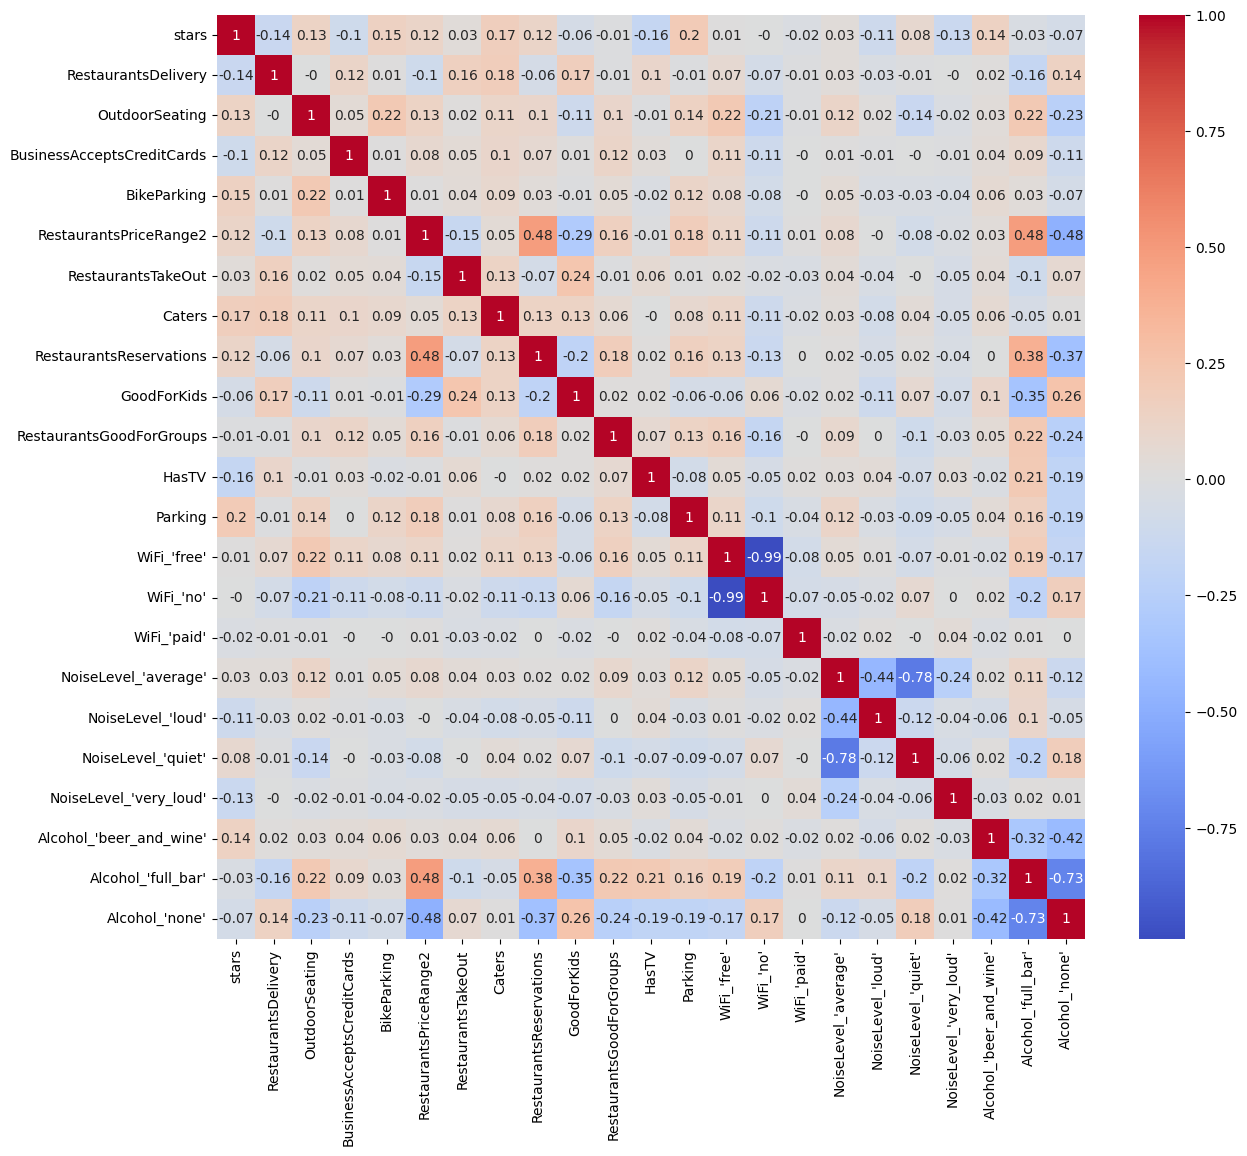

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix rounding to one decimal point
correlation_matrix = restaurant_attributes_heatmap_df.corr().round(2)

# Enlarge the image for better viewing
plt.figure(figsize=(14, 12))

# Print a correlation heat map
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True)

#**Data Analysis**

Since we have selected the cities for restaurant expansion, here we will statistically analyse the checkins for each city.

In [ ]:
# Group by city and calculate total check-ins
city_checkins_total = restaurant_checkin_after2020_total_df.groupby('city')['total_checkins_after_2020'].sum()

# Sort cities based on total check-ins in descending order and select top 10
top_8_cities = city_checkins_total.sort_values(ascending=False).head(8)
top_8_cities

city
New Orleans      57982
Philadelphia     56317
Tampa            56077
Nashville        42169
Reno             38649
Indianapolis     38005
Tucson           31352
Santa Barbara    25660
Name: total_checkins_after_2020, dtype: int64

In [ ]:
# Filter the original DataFrame to include only data for the top 10 cities
top_8_cities_df = restaurant_checkin_after2020_total_df[restaurant_checkin_after2020_total_df['city'].isin(top_8_cities.index)]

# Calculate summary statistics for the top 8 cities
top_8_cities_df.groupby('city')['total_checkins_after_2020'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Indianapolis,1850.0,20.543243,32.200620,1.0,3.0,9.0,24.0,311.0
Nashville,1572.0,26.825064,48.650921,1.0,3.0,10.0,30.0,669.0
New Orleans,1379.0,42.046410,102.950060,1.0,5.0,16.0,45.0,1698.0
Philadelphia,3052.0,18.452490,36.837432,1.0,3.0,7.0,19.0,953.0
Reno,837.0,46.175627,72.766103,1.0,7.0,21.0,59.0,1096.0
Santa Barbara,461.0,55.661605,94.125901,1.0,9.0,25.0,55.0,819.0
Tampa,1918.0,29.237226,53.193543,1.0,4.0,11.0,32.0,735.0
Tucson,1559.0,20.110327,32.504044,1.0,3.0,9.0,23.0,394.0


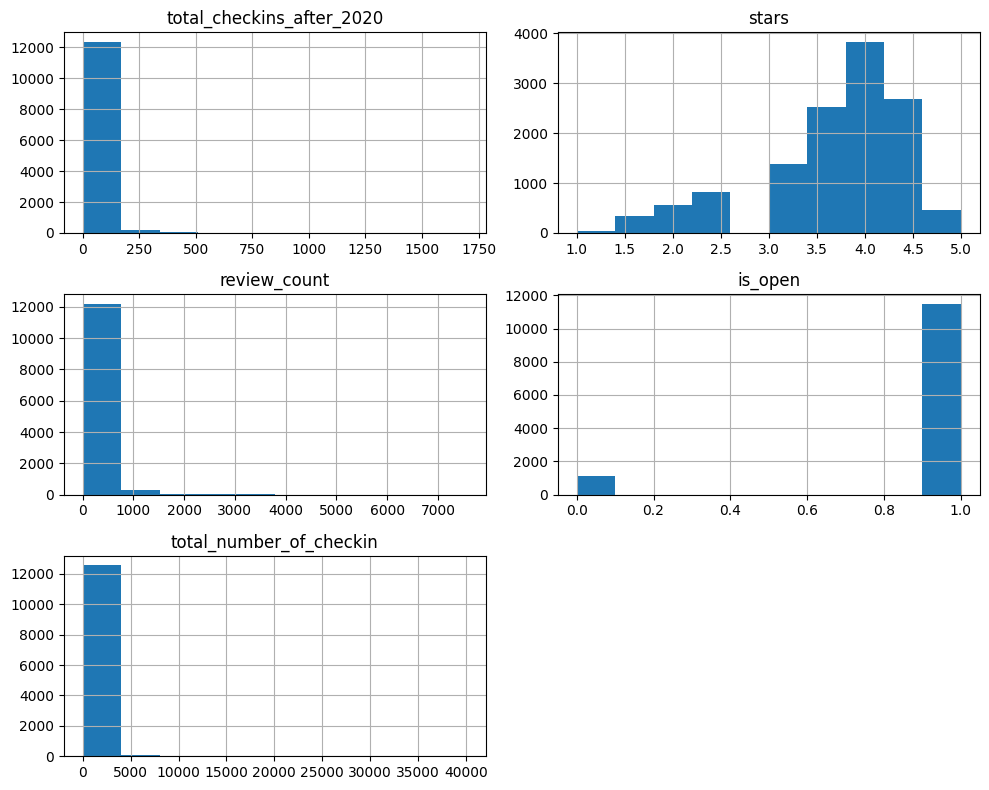

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots for each column
top_8_cities_df.hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Indianapolis'),
  Text(1, 0, 'Philadelphia'),
  Text(2, 0, 'New Orleans'),
  Text(3, 0, 'Reno'),
  Text(4, 0, 'Nashville'),
  Text(5, 0, 'Tucson'),
  Text(6, 0, 'Tampa'),
  Text(7, 0, 'Santa Barbara')])

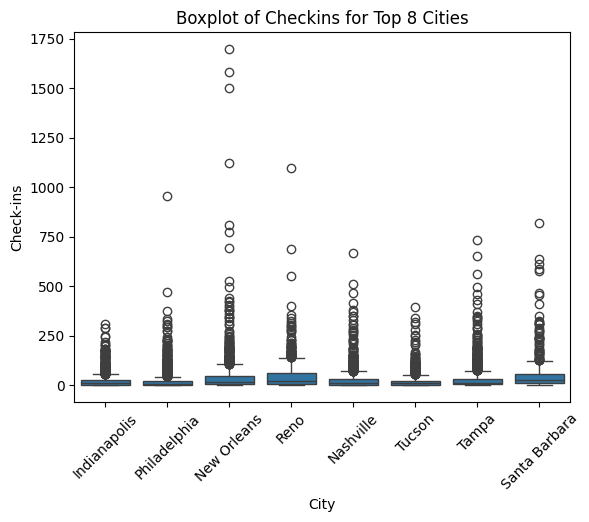

In [ ]:
sns.boxplot(x='city', y='total_checkins_after_2020', data=top_8_cities_df)
plt.title('Boxplot of Checkins for Top 8 Cities')
plt.xlabel('City')
plt.ylabel('Check-ins')
plt.xticks(rotation=45)